## Homework 5

Use scikit-learn to perform digit classification using 
data from Homework 2 (mnist_test.csv)

First, the basic modules and the dataset are loaded.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

mnist_test = pd.read_csv("mnist_test.csv")

Now a little sample of the images with their respective correct digits are shown:

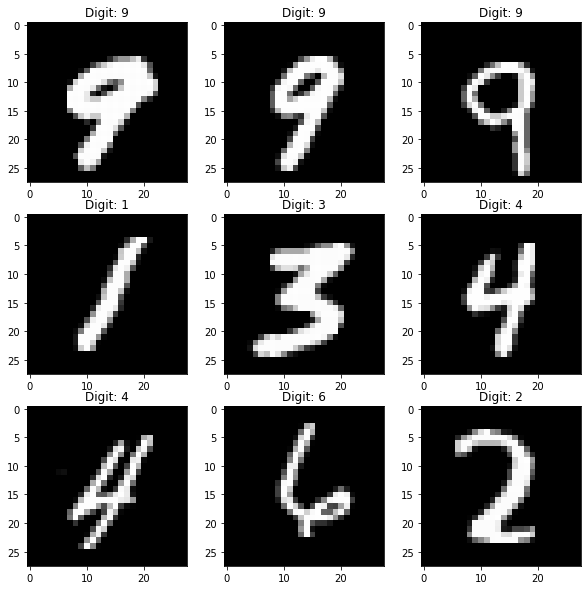

In [9]:
X_data = mnist_test.iloc[:,1:].to_numpy().reshape((10000, 28, 28))
y_data = mnist_test["label"].to_numpy()

plt.figure(figsize=(10,10))

random_imgs_idx = np.random.randint(0,10000,(25))

for i in range(3):
    for j in range(3):
        plt.subplot(3,3,i*3 + j + 1)
        plt.title("Digit: " + str(y_data[random_imgs_idx[i*5 + j]]))
        plt.imshow(X_data[random_imgs_idx[i*5 + j]], cmap="gray")

First we preprocess the loaded data:

In [37]:
X_data = mnist_test.iloc[:,1:].to_numpy()/255.
y_data = mnist_test["label"].to_numpy()

Now the data is split with its corresponding function:

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,test_size = 0.2)

Next, the model is trained:

In [39]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Camilo\anaconda3\envs\neural-nets-uni\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Now that the model is trained, we can evaluate it agains the test data:

In [50]:
print("The percentage of the data that was accurately predicted in the test set is " + str(sum(logreg.predict(X_test) == y_test)/len(y_test)*100) + "%")

The percentage of the data that was accurately predicted in the test set is 89.85%
